In [2]:
#importing all the libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import random
import math
from IPython.display import clear_output

In [3]:
#loading H matrix from Hmatrix.mat file and converting it to numpy array
mat = scipy.io.loadmat('Hmatrix3.mat')
arr = mat['H']

In [4]:
#defining the number of rows and columns
colm = len(arr[0])
row = len(arr)
print(colm)
print(row)

12
9


In [5]:
c=np.zeros(colm) #Input of BSC Channel
#creating p evenly spaced
p = np.linspace(0, 1.1, 11, endpoint = False)
print(p)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [6]:
nsim = 100
nsuc = np.zeros(len(p)) #Array to store success
print(nsuc)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
loop_count = -1
for yy in range(len(p)):    
    loop_count += 1
    for z in range(nsim): #Monte-Carlo Simulation
        clear_output(wait = True)
        print(loop_count+(np.round((z/nsim)*100, 2))/100,"%")
        #c=zeros(1,length(h));
        e = []
        for i in range(colm):
            if(random.random() < p[yy]): #noise generated
                e.append(1)
            else:
                e.append(0)
        #e=rand(1,colm)<p(yy)
        #cr=e;
        #cr=xor(c,e);
        cr = []
        for i1 in range(len(e)):
            cr.append(int((c[i1]+e[i1])%2)) #message generated after introducing noise
        #cr=rem(c+e,2)
        #ct=cr;
        #     c0=1-cr;
        #     c0=abs(1-cr);
        #     c0=xor(cr,1);
        for a in range(100): #Iteration loop
            #majority voting array for storing votes of respective bits
            #variable node sending its own value and storing it 
            c0 = [] #storing its own voting for bit 0
            for var in cr:
                c0.append(int((var+1)%2))
            #c0=rem(cr+1,2);
            c1=cr #storing its own voting for bit 1
            temp=cr #message stored in temporary variable used for breaking condition later in this code 
            for i in range(row):
                for j in range(colm):
                    if(arr[i][j]==1):
                        s=0
                        for k in range(colm):
                            #check node sending values to variable node by taking XOR of all connected bits except the given bit
                            if(arr[i][k]==1 and k!=j):
                                s=s+cr[k]
                        #here doing modulo 2 which is equivalent to XOR of that variable        
                        s=int(s%2)
                        #incrementing majority voting array according to value received by check node
                        if(s==1):
                            c1[j]=c1[j]+1
                        else:
                            c0[j]=c0[j]+1
            #doing majority Voting                
            for l in range(len(cr)):
                if(c1[l]>c0[l]):
                    cr[l]=1
                elif(c0[l]>=c1[l]):
                    cr[l]=0
            temp_sum = 0
            for var in cr:
                temp_sum += var 
            if(temp_sum==0): #checking if messsage is successfully decoded or not and breaking the iteration loop
                nsuc[yy]=nsuc[yy]+1
                break
            if(temp==cr): #breaking condition when code cant be decoded successfully
                 break

10.99 %


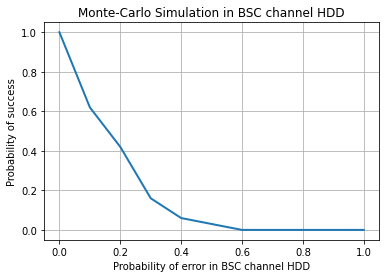

In [8]:
pp = []
for var in nsuc:
    pp.append(var/nsim)
#pp=nsuc/nsim;
plt.plot(p,pp,linewidth = 2)
plt.title("Monte-Carlo Simulation in BSC channel HDD")
plt.xlabel("Probability of error in BSC channel HDD")
plt.ylabel("Probability of success") 
plt.grid()